# 坐标参考系统（Coordinate Reference Systems）

### 简要介绍

坐标参考系统（CRS，Coordinate Reference System） 是一个数学构造，是地理学（Geography）这一学科的基础要素之一。
它主要承担着两个非常重要的作用：
1. 以明确且精确的方式，唯一地确定空间对象的位置
2. 在地图上准确地表达（呈现）空间对象

在其最基本的形式下，一个 CRS 由两个要素构成：
1. 基准（Datum） —— 一个用来近似地球形状的球体或椭球体，并且相对于真实地球进行了定位。
2. 地图投影（Cartographic Projection） —— 一组数学函数，用于将位于 基准（datum） 表面上的位置，转换到笛卡尔平面（Cartesian plane）中。

世界大地测量系统（WGS 84，World Geodetic System 1984） 是一组由美国国家地理空间情报局（National Geospatial Intelligence Agency，NGA）维护的 基准（datums），用于对整个地球表面进行近似描述。如今，大多数 GPS 或 GNSS 接收器所报告的地理坐标（纬度与经度），都是以 WGS 84 的某一个 基准（datum） 作为参考的。对于全球尺度的制图而言，WGS 84 是一个方便的选择；但在大多数情况下，对于本地制图（local mapping），使用一个为特定区域量身定制的 基准（datum） 会更加合适。因此，各国的国家测量机构（National Surveys）都定义了适合其国家或地区特性的特定 基准（datums）。

![Geodesic Datum](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Gloabl_and_Regional_Ellipsoids.svg/640px-Gloabl_and_Regional_Ellipsoids.svg.png)
    
*Sketch of geodesic datums positioned relative to the Earth's surface. Source: [Wikipedia](https://en.wikipedia.org/wiki/Geodetic_datum).* 

等距圆柱投影（Equirectangular）和墨卡托投影（Mercator）是当今最为常见的投影方式，然而，这两种投影都不适合用于本地制图或全球制图。因此，花一些时间去识别最适合当前具体工作需求的投影方式始终是十分有必要的。

地图投影在将地球的曲面展平到一个平面上的过程中，不可避免地会引入误差，因此必须在面积、形状与角度的精确性之间取得平衡。

在全球制图中，诸如 [Mollweide 等面积投影（Mollweide's Homolographic）](https://en.wikipedia.org/wiki/Mollweide_projection)、[Eckert IV 投影](https://en.wikipedia.org/wiki/Eckert_IV_projection) 或 [Goode 同割投影（Goode's Homolosine）](https://en.wikipedia.org/wiki/Goode_homolosine_projection) 等投影方式，在不同失真特性之间提供了具有参考价值的折中方案。

在本地制图中，[立体投影（Stereographic）](https://en.wikipedia.org/wiki/Stereographic_projection#Applications_to_other_disciplines)、[Lambert 方位等面积投影（Lambert's Azimutal Equal-Area）](https://en.wikipedia.org/wiki/Lambert_azimuthal_equal-area_projection) 以及 [Gauss–Krüger 投影](https://en.wikipedia.org/wiki/Transverse_Mercator_projection#Ellipsoidal_transverse_Mercator)（*亦称*“横轴墨卡托投影 / Transverse Mercator”）都是常见的选择，但可用的投影方式远不止这些。


![Map Projections](https://upload.wikimedia.org/wikipedia/commons/0/02/Kaardiprojektsiooni_klassid.gif)

*简单地图投影对 *基准（datum）* 所施加变换的可视化示例。来源：[Wikipedia](https://en.wikipedia.org/wiki/Map_projection)。*

务必牢记一点：**没有任何一种地图投影能够完全正确地保留距离**。因此，应当**避免在笛卡尔平面上计算距离**，因为所得结果必然是有误差的。
在研究范围较小的情况下，这种误差可能可以忽略不计；但在全球尺度或大陆尺度下，即便是像俄罗斯这样幅员辽阔的国家，在笛卡尔平面上计算得到的距离也会出现显著偏差。

### Python 库

[PROJ](https://proj.org) 库是 FOSS4G 生态中的基石之一，实现了大量的地图投影以及绝大多数的大地测量基准（geodetic datums）。PROJ 所实现的[地图投影列表](https://proj.org/operations/projections/index.html)是一个非常好的起点，可以用来探索不同投影各自的特性。[pyproj](https://pyproj4.github.io/pyproj/stable/) 是 PROJ 的原生 Python 接口。

作为另一种选择，GDAL/OGR 的 Python API 也包含了一个用于处理空间参考系统（Spatial Reference Systems，SRS）的专用模块：[osgeo.osr](https://gdal.org/python/osgeo.osr-pysrc.html)。在某些使用场景下，这种方式可能会更加方便。

### 创建一个新的坐标参考系统（CRS）对象

在 `pyproj` 中，CRS 这一概念被封装在一个同名的类中：`CRS`。该类的对象可以通过多种不同的方式进行参数化。其中最简单的一种方式，可能是使用 [PROJ4 字符串](https://proj.org/usage/quickstart.html)：这是一种由一组参数构成的、简洁且表达力强的字符串。

这种方式可以通过静态方法 `from_proj4` 来创建：


In [1]:
from pyproj import CRS
hammer = CRS.from_proj4("+proj=hammer +lat_0=0 +lon_0=0 +datum=WGS84 +units=m +no_defs +wktext")
hammer

<Projected CRS: +proj=hammer +lat_0=0 +lon_0=0 +datum=WGS84 +units ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: PROJ hammer
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

尽管 PROJ 字符串使用起来较为简单，但它们在某些情况下仍然存在一定的歧义性。初始化 `CRS` 对象的一种**更加正式且精确**的方法，是使用 [OGC Well Known Text](https://www.opengeospatial.org/standards/wkt-crs)（WKT）定义。

这种方式的描述要冗长得多，但同时也更加准确。下面的示例使用基于 WGS 84 基准系列的地理坐标系统，来初始化一个新的 CRS 对象：


In [2]:
geographic = CRS.from_wkt(
	'''GEOGCS[
		"WGS 84",
		DATUM[
			"WGS_1984",
			SPHEROID[
				"WGS 84",6378137,298.257223563,
				AUTHORITY["EPSG","7030"]
			],
			AUTHORITY["EPSG","6326"]
		],
		PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],
		UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],
		AUTHORITY["EPSG","4326"]
	]''')
geographic

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

需要注意的是，这里并未定义任何投影方式，该坐标系统应当**严格地仅指纬度和经度**。然而，大多数 GIS 程序会将这一 CRS 解释为**包含等距圆柱投影（Equirectangular）**（因此在进行距离或面积计算时需要格外小心）。

[欧洲石油勘探组织（European Petroleum Survey Group，EPSG）](http://wiki.gis.com/wiki/index.php/European_Petroleum_Survey_Group) 曾是一个为欧洲石油与天然气行业提供支持的科学组织。该组织建立了一个[内容极其丰富的数据库](http://www.epsg.org/)，其中包含了大量参数以及完整的 CRS 定义，旨在帮助行业实现制图流程的标准化。

EPSG 为其数据库中的每一条记录分配了一个唯一的数值标识符，这使得人们能够快速引用某一个**明确且定义良好的 CRS**。绝大多数开源地理空间软件都支持使用 EPSG 标识符作为快捷引用方式（有些甚至强制要求使用）。

诸如 [epsg.io](https://epsg.io) 这样的工具，可以用于快速、便捷地验证 EPSG 代码。PROJ 和 GDAL 也不例外，因此 `CRS` 对象同样可以通过 EPSG 标识符来进行初始化：

In [3]:
gauss_krueger_arg = CRS.from_epsg(22174)
gauss_krueger_arg

<Projected CRS: EPSG:22174>
Name: POSGAR 98 / Argentina 4
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Argentina - between 64°30'W and 61°30'W, onshore.
- bounds: (-64.5, -54.91, -61.5, -21.99)
Coordinate Operation:
- name: Argentina zone 4
- method: Transverse Mercator
Datum: Posiciones Geodesicas Argentinas 1998
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

除了上述方式之外，还有其他方法可以用来初始化 `CRS` 对象，但这些是最为常见的几种。

此外，还可以将一个 `CRS` 导出为多种不同的格式，以便其他软件读取或使用。例如，`to_wkt` 方法可以生成一个 WKT 字符串：

In [4]:
print(gauss_krueger_arg.to_wkt(pretty=True))

PROJCRS["POSGAR 98 / Argentina 4",
    BASEGEOGCRS["POSGAR 98",
        DATUM["Posiciones Geodesicas Argentinas 1998",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4190]],
    CONVERSION["Argentina zone 4",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",-90,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-63,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",1,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",4500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,
            LENGTHUNIT["metre",1],
    

最后给出一个输出 PROJ4 字符串的示例。请注意，`pyproj` 会提示在使用这种方法时**可能会发生信息丢失**。

In [5]:
gauss_krueger_arg.to_proj4()

/home/red/miniforge3/envs/geo/lib/python3.11/site-packages/pyproj/crs/crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


'+proj=tmerc +lat_0=-90 +lon_0=-63 +k=1 +x_0=4500000 +y_0=0 +ellps=GRS80 +units=m +no_defs +type=crs'

### 创建并使用 CRS 转换

在对 CRS 进行参数化之后，就可以在不同坐标系统之间进行坐标转换了。在 `pyproj` 中，这是通过 `Transformer` 类来实现的。该类在初始化时需要指定一个输入 CRS 和一个输出 CRS。

下面的示例定义了一个从地理坐标系统转换到采用 Gauss–Krüger 投影的阿根廷 CRS 的转换关系：

In [6]:
from pyproj import Transformer
transformArgentina = Transformer.from_crs(geographic, gauss_krueger_arg)
transformArgentina

<Concatenated Operation Transformer: pipeline>
Description: Inverse of POSGAR 98 to WGS 84 (1) + Argentina zone 4
Area of Use:
- name: Argentina - onshore and offshore.
- bounds: (-73.59, -58.41, -52.63, -21.78)

*Puente de la Mujer* 是布宜诺斯艾利斯的一座现代地标性建筑。相对于最新的 WGS84 *基准（datum）*，其坐标大约为南纬 34.61°、西经 58.37°。下面我们使用 `transform` 方法，来查看它在阿根廷坐标系统中的坐标。

In [7]:
transformArgentina.transform(-34.61, -58.37) #latitude comes first

(6160876.2523681605, 4924824.978622343)

请回忆前文提到的内容：在大多数地理坐标参考系统（例如 WGS84）中，**纬度在前、经度在后**；而在笛卡尔坐标系统中，则是**先 Easting（*x* 轴），再 Northing（*y* 轴）**。

问题：该坐标系统的中央子午线位于布宜诺斯艾利斯以东 2°，那么为什么计算得到的 Easting 坐标数值会如此之大？

### 实践示例

在许多情况下，我们需要处理由他人创建的空间数据。因此，清晰地识别这类数据所使用的 CRS 非常重要，以确保它与分析过程中所使用的 CRS 相匹配。

下面的示例打开一个包含阿根廷国界的数据集，并检查其 CRS。这类数据会在 [Vector Data](04-vector-data.ipynb) 章节中进行更详细的介绍。

In [8]:
import fiona
src_borders = fiona.open('../data/argentina.gpkg')
src_borders.crs_wkt

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

该数据集仅包含地理坐标，并且参考的是 WGS84 基准系列。`longlat` 参数表示：在对数据进行绘制或直接用于空间分析时，会应用 [等距圆柱投影（Equirectangular projection）](https://en.wikipedia.org/wiki/Equirectangular_projection)。这种投影方式也被称为 “Plate Carré”。

那么，这在实际中意味着什么呢？最好的方式是将数据绘制出来，直观地看看它的表现效果。一种简单的做法是使用 `matplotlib` 库，本质上就是将一组坐标对传递给一个 X–Y 图进行绘制。在本例中，使用了 `shapely` 库中的 `shape` 方法，从前面打开的文件中提取坐标对。

Text(0.5, 1.0, 'Argentina - Equirectangular projection')

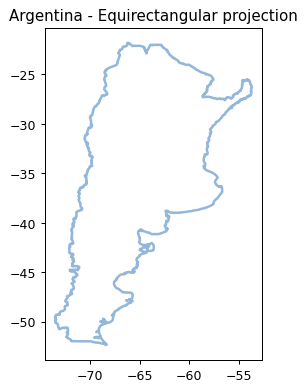

In [9]:
from matplotlib import pyplot as plt
from shapely.geometry import shape

feature = next(iter(src_borders))
borders = shape(feature["geometry"])

x,y = borders.geoms[0].exterior.xy

fig = plt.figure(1, dpi=90)
# Without equal aspect the map can be distorted
ax = fig.add_subplot(111, aspect='equal') 
ax.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=2, solid_capstyle='round', zorder=2)
ax.set_title('Argentina - Equirectangular projection')

如果分析过程中需要使用不同的 CRS，该怎么办呢？此时可以再次使用 `transformArgentina` 对象，但需要牢记正确的坐标轴顺序，即 *(纬度, 经度)*。

In [10]:
coords_transf = transformArgentina.transform(y, x) # Latitude first

可以再次使用 `matplotlib` 对结果进行可视化检查。

Text(0.5, 1.0, 'Argentina - Gauss-Krüger (datum POSGAR 2007)')

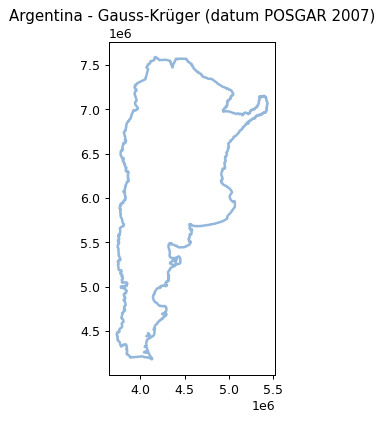

In [11]:
fig = plt.figure(1, dpi=90)
ax = fig.add_subplot(111, aspect='equal')
ax.plot(coords_transf[1], coords_transf[0], color='#6699cc', alpha=0.7,
    linewidth=2, solid_capstyle='round', zorder=2)   
ax.set_title('Argentina - Gauss-Krüger (datum POSGAR 2007)')

为什么这两种边界形状看起来并不相似？在阿根廷进行空间分析时，你会选择哪一种空间参考系统（SRS）？

## 总结

- 在使用任何数据集之前，都应始终检查其所使用的坐标系统，无论是用于复杂分析还是简单制图。
- 在对多个数据集进行组合之前，务必确保它们都处于同一个空间参考系统（SRS）中。
- 在地理坐标系统中，坐标顺序往往比较“反直觉”：**纬度在前，经度在后**。
- 应花一些时间来识别最适合当前研究任务的 CRS：
  - 是采用本地基准还是全球基准；
  - 投影所带来的失真特性。

---
[<- 几何（Geometry）](02-geometry.ipynb) | [Vector data ->](04-vector-data.ipynb)
